<a href="https://colab.research.google.com/github/AKSHat5274/AKSHat5274/blob/main/ChurnModellingUsingMLOps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First clone the repo 
!git clone https://github.com/Manoj15/BMSIT_ML_Session.git

Cloning into 'BMSIT_ML_Session'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


**Objective**



*   Build a model using automated machine learning package "PyCaret"
*   Track Model Experiments using MLFlow
*   Look into Model Explainability
*   Deploy Model using API



**Problem Statement**

Build a churn model for an e-commerce company using relevant data containing user information and behaviour.

**Data Description**



*   CustomerID : Unique customer ID
*   Churn : Churn Flag
*   Tenure : Tenure of customer in organization
*   PreferredLoginDevice : Preferred login device of customer
*   CityTier : City tier
*   WarehouseToHome : Distance in between warehouse to home of customer
*   PreferredPaymentMode : Preferred payment method of customer
*   Gender : Gender of customer
*   HourSpendOnApp : Number of hours spend on mobile application or website
*   NumberOfDeviceRegistered
Total number of deceives is registered on particular customer
*   PreferedOrderCat : Preferred order category of customer in last month
*   SatisfactionScore : Satisfactory score of customer on service
*   MaritalStatus : Marital status of customer
*   NumberOfAddress : Total number of added added on particular customer
*   Complain : Any complaint has been raised in last month
*   OrderAmountHikeFromlastYear : Percentage increases in order from last year
*   CouponUsed : Total number of coupon has been used in last month
*   OrderCount : Total number of orders has been places in last month
*   DaySinceLastOrder : Day Since last order by customer
*   CashbackAmount : Average cashback in last month

**Code**

In [2]:
!pip install -r /content/BMSIT_ML_Session/requirements.txt

     |████████████████████████████████| 15.1MB 260kB/s 
     |████████████████████████████████| 266kB 42.7MB/s 
     |████████████████████████████████| 358kB 45.1MB/s 
     |████████████████████████████████| 14.2MB 305kB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 747kB 44.1MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
     |████████████████████████████████| 2.0MB 53.7MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 6.8MB 40.2MB/s 
     |████████████████████████████████| 256kB 43.4MB/s 
     |████████████████████████████████| 1.7MB 35.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4MB 36.1MB/s 
     |████████████████████████████████| 112kB 52.0MB/

In [4]:
# Importing packages
import numpy as np
import pandas as pd 

# Automated EDA
import sweetviz as sv

# AutoML package
from pycaret.classification import *

In [5]:
# Read Data
churn_df = pd.read_excel('/content/BMSIT_ML_Session/E_Commerce_Dataset.xlsx', sheet_name='E Comm')
churn_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
# Some EDA
#analyzing the dataset
churn_report = sv.analyze(churn_df)
#display the report
churn_report.show_html('churn_eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report churn_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# New Section

In [9]:
churn_df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [11]:
# initializing setup for AutoML
churn_ml_df = setup(data = churn_df, target = 'Churn', ignore_features = ['CustomerID'], log_experiment = True, experiment_name = 'churn_model')

,Description,Value
0,session_id,6102
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5630, 20)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
# Run & Compare all baseline models and select top 10
top10 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9434,0.9670,0.7655,0.8848,0.8198,0.7865,0.7901,0.125
et,Extra Trees Classifier,0.9365,0.9684,0.6451,0.9688,0.7724,0.7375,0.7592,0.714
rf,Random Forest Classifier,0.9345,0.9684,0.6421,0.9551,0.7653,0.7293,0.7501,0.717
dt,Decision Tree Classifier,0.9185,0.8617,0.7760,0.7506,0.7628,0.7136,0.7140,0.057
gbc,Gradient Boosting Classifier,0.8985,0.9187,0.5520,0.7840,0.6447,0.5880,0.6020,0.761
lr,Logistic Regression,0.8893,0.8762,0.5113,0.7528,0.6070,0.5458,0.5606,0.764
ada,Ada Boost Classifier,0.8891,0.8994,0.5506,0.7264,0.6244,0.5611,0.5696,0.271
lda,Linear Discriminant Analysis,0.8860,0.8693,0.5069,0.7337,0.5973,0.5340,0.5475,0.105
ridge,Ridge Classifier,0.8759,0.0000,0.3235,0.8445,0.4645,0.4108,0.4727,0.031
knn,K Neighbors Classifier,0.8503,0.8277,0.3820,0.5833,0.4600,0.3781,0.3901,0.159


In [14]:
## Thanks to https://github.com/XiwangLi/mlflow-colab/blob/master/MLflow.ipynb
get_ipython().system_raw("mlflow ui --port 80 &")# run tracking UI in the background

In [15]:
!pip install pyngrok --quiet
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = ""
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 80 for http://localhost:5000
public_url = ngrok.connect(port="80", proto="http", options={"bind_tls": True},  )
print("MLflow Tracking UI:", public_url)

MLflow Tracking UI: NgrokTunnel: "http://d1472bd0d7f6.ngrok.io" -> "http://localhost:80"


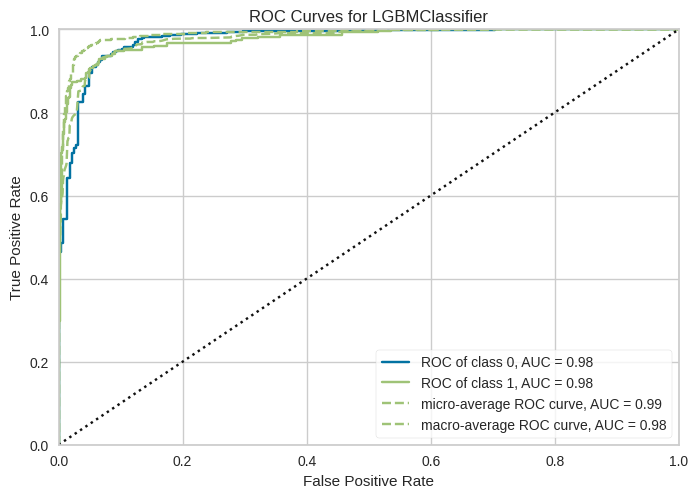

In [16]:
# Plot Models ROC

plot_model(top10)

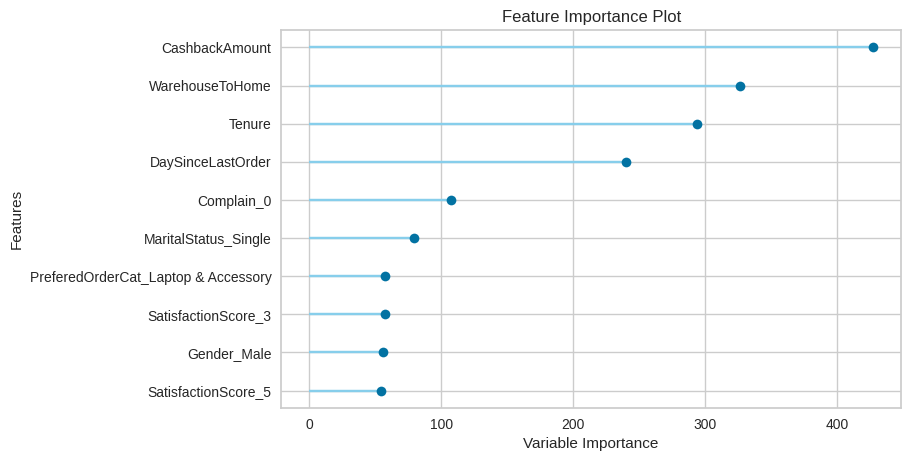

In [17]:
# check feature importance
plot_model(top10, plot = 'feature')

In [18]:
# Save Pipeline and Model
# finalize the model
final_best = finalize_model(top10)
# save model to disk
save_model(final_best, 'churn-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['CustomerID'],
                                       id_columns=['CustomerID'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numer...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

In [ ]:
# API Creation
from fastapi import FastAPI
import uvicorn
import nest_asyncio
nest_asyncio.apply()

# 2. Create the app object
app = FastAPI()

#. Load trained Pipeline
model = load_model('churn-pipeline')

# Define predict function
@app.post('/predict')
def predict(Tenure, PreferredLoginDevice, CityTier,
            WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp,
            NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore,
            MaritalStatus, NumberOfAddress, Complain,
            OrderAmountHikeFromlastYear, CouponUsed, OrderCount,
            DaySinceLastOrder, CashbackAmount):
    data = pd.DataFrame([[Tenure, PreferredLoginDevice, CityTier,
                          WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp,
                          NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore,
                          MaritalStatus, NumberOfAddress, Complain,
                          OrderAmountHikeFromlastYear, CouponUsed, OrderCount,
                          DaySinceLastOrder, CashbackAmount]])
    data.columns = ['Tenure', 'PreferredLoginDevice', 'CityTier',
                    'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
                    'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
                    'MaritalStatus', 'NumberOfAddress', 'Complain',
                    'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                    'DaySinceLastOrder', 'CashbackAmount']

    predictions = predict_model(model, data=data) 
    return {'prediction': int(predictions['Label'][0])}

if __name__ == '__main__':
    uvicorn.run(app, host='127.0.0.1', port=8000)

INFO:     Started server process [57]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Transformation Pipeline and Model Successfully Loaded


Thanks to Moez Ali (Founder of PyCaret) for providing such an awesome package.
References :

*   https://towardsdatascience.com/easy-mlops-with-pycaret-mlflow-7fbcbf1e38c6
*   https://towardsdatascience.com/build-with-pycaret-deploy-with-fastapi-333c710dc786

